# INF391 - Tarea 8
Dado el siguiente conjunto de transacciones:

* Muestre todos los **itemset frecuentes** usando el algoritmo *Apriori* considerando un soporte mínimo $\mathbf{minsup}=0.2$. ¿Cuál es el itemset más frecuente?. ¿Qué razón tiene su alta frecuencia?.
* ¿Qué reglas superan el umbral de confianza mínima $\mathbf{minconf}=0.6$?. Comente los resultados obtenidos.
* Graficar el scatter plot *Support* vs *Confidence*. Interpretar el gráfico. Compare la regla con mayor Soporte versus la regla con mayor Confianza. ¿Qué puede concluir al respecto?.


In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('retail_dataset.csv', sep=',')
print ("Número de transacciones:", df.shape[0])
df.head()

Número de transacciones: 315


,0,1,2,3,4,5,6
0,Pan,Vino,Huevos,Carne,Queso,Lápiz,Pañales
1,Pan,Queso,Carne,Pañales,Vino,Leche,Lápiz
2,Queso,Carne,Huevos,Leche,Vino,NaN,NaN
3,Queso,Carne,Huevos,Leche,Vino,NaN,NaN
4,Carne,Lápiz,Vino,NaN,NaN,NaN,NaN


In [3]:
items = (df['0'].unique())
print(str(len(items)) + " Items:", items)

9 Items: ['Pan' 'Queso' 'Carne' 'Huevos' 'Vino' 'Bagel' 'Lápiz' 'Pañales' 'Leche']


In [4]:
items_car =[list(i[~pd.isnull(i)]) for i in df.values]
te = TransactionEncoder()
te_ary = te.fit(items_car).transform(items_car)
dataframe_binario = pd.DataFrame(te_ary, columns=te.columns_)

**Generar itemsets frecuentes**

La función  ```apriori``` recibe un dataframe binario (compuesto por 0 y 1).



In [5]:
itemset_frecuentes = apriori(dataframe_binario, min_support=0.2, use_colnames=True)

In [6]:
itemset_frecuentes

,support,itemsets
0,0.425397,(Bagel)
1,0.476190,(Carne)
2,0.438095,(Huevos)
3,0.501587,(Leche)
4,0.361905,(Lápiz)
5,0.504762,(Pan)
6,0.406349,(Pañales)
7,0.501587,(Queso)
8,0.438095,(Vino)
9,0.225397,"(Leche, Bagel)"


In [7]:
max_1_itemset = itemset_frecuentes.iloc[0:9,].reset_index(drop=True)
max_2_itemset = itemset_frecuentes.iloc[9:31,].reset_index(drop=True)
max_3_itemset = itemset_frecuentes.iloc[31:,].reset_index(drop=True)

max_1_itemset = max_1_itemset.loc[max_1_itemset['support'].argmax()]
max_2_itemset = max_2_itemset.loc[max_2_itemset['support'].argmax()]
max_3_itemset = max_3_itemset.loc[max_3_itemset['support'].argmax()]

In [8]:
print(max_1_itemset,'\n\n',max_2_itemset,'\n\n',max_3_itemset)

support     0.504762
itemsets       (Pan)
Name: 5, dtype: object 

 support            0.32381
itemsets    (Queso, Carne)
Name: 5, dtype: object 

 support                   0.215873
itemsets    (Queso, Huevos, Carne)
Name: 0, dtype: object


### Análisis

> ¿Cuál es el itemset más frecuente?

Para contestar esta pregunta, se consideraran los $k-itemset$ con $k\in[1,3]$, de los cuales se escogerá el cual tenga el mayor `support`.

Para $1-itemset$ se tiene el set `(Pan)`, para $2-itemset$ se tiene el set `(Queso, Carne)`, y para el $3-itemset$ se tiene el set `(Queso, Huevos, Carne)`:

> ¿Qué razón tiene su alta frecuencia?.

Para comprender la alta frecuencia, debemos considera los `support` de cada $k-itemset$. Recordemos que el `support` determina qué tan frecuentemente aplicable es una regla a un itemset dado. El `support` se define como:

$$
s(X\to Y) = \frac{\sigma(X\cup Y)}{N}
$$

Donde $X\to Y$ corresponde a una regla de asociación, y $\sigma()$ al `Itemset Support`.

Luego, buscamos un soporte que tenga un valor alto, dado que esto implica que su $\sigma()$ será mayor, y a su vez nos indica que posee una mayor frecuencia.

**Reglas interesantes**

In [9]:
reglas_interesantes = association_rules(itemset_frecuentes, metric="confidence", min_threshold=0.6)

In [10]:
reglas_interesantes

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Pan),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Huevos),(Carne),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
2,(Queso),(Carne),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
3,(Carne),(Queso),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Huevos),(Queso),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
5,(Leche),(Queso),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
6,(Queso),(Leche),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
7,(Vino),(Queso),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
8,"(Huevos, Queso)",(Carne),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773
9,"(Queso, Carne)",(Huevos),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714


In [11]:
reglas_interesantes.loc[reglas_interesantes['lift'].argmax()]

antecedents           (Leche, Carne)
consequents                  (Queso)
antecedent support          0.244444
consequent support          0.501587
support                     0.203175
confidence                  0.831169
lift                         1.65708
leverage                   0.0805644
conviction                   2.95214
Name: 12, dtype: object

### Análisis

> ¿Qué reglas superan el umbral de confianza mínima $\mathbf{minconf}=0.6$?. Comente los resultados obtenidos.

Las 14 reglas mostradas en la tabla anterior corresponden a las reglas de asociación con un mayor $\mathbf{minconf}=0.6$. De estos valores, podemos destacar aquellos que tengan un `support` y `confidence` alto. Recordemos que el `confidence` de un itemset determina con qué frecuencia aparecen los elementos de set $Y$ en las items que contiene $X$. Esta se define como:

$$
c(X\to Y) = \frac{\sigma(X\cup Y)}{\sigma(X)} = \frac{s(X\to Y)}{s(X)}
$$

Ahora, necesitamos de un estadísticos que relacione `support` y `confidence`, para entender como se comporta una regla. Para ello, haremos uso del `lift`, definido como:

$$
\text{lift}(X\to Y) = \frac{c(X\to Y)}{s(Y)}
$$

Esta métrica se usa comúnmente para medir la frecuencia con la que el `confidence` y el `support` de una regla $X\to Y$ ocurren juntos, cuando $X$ e $Y$ fueran estadísticamente independientes.

Finalmente, apartir de esto, podemos obserevar que el mayor `lift` corresponde a la regla  $\text{(Leche, Carne)}\to \text{(Queso)}$.

**Scatter Plot**

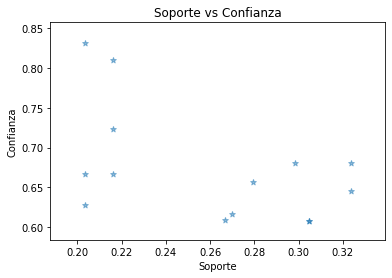

In [12]:
plt.scatter(reglas_interesantes['support'], reglas_interesantes['confidence'], alpha=0.5, marker="*")
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Soporte vs Confianza')
plt.show()

### Análisis

> Interpretar el gráfico. Compare la regla con mayor Soporte versus la regla con mayor Confianza. ¿Qué puede concluir al respecto?.

De acuerdo a los datos graficados, vemos que aquellos que tiene mayor `support`, tienden a un menor grado de `confidence`, y viceversa, produciendo un comportamiento inversamente proporcional en estas métricas.

Esto puede verse reflejado nuevamente en el `lift`, pero para comprender esto, veamos la siguiente figura:

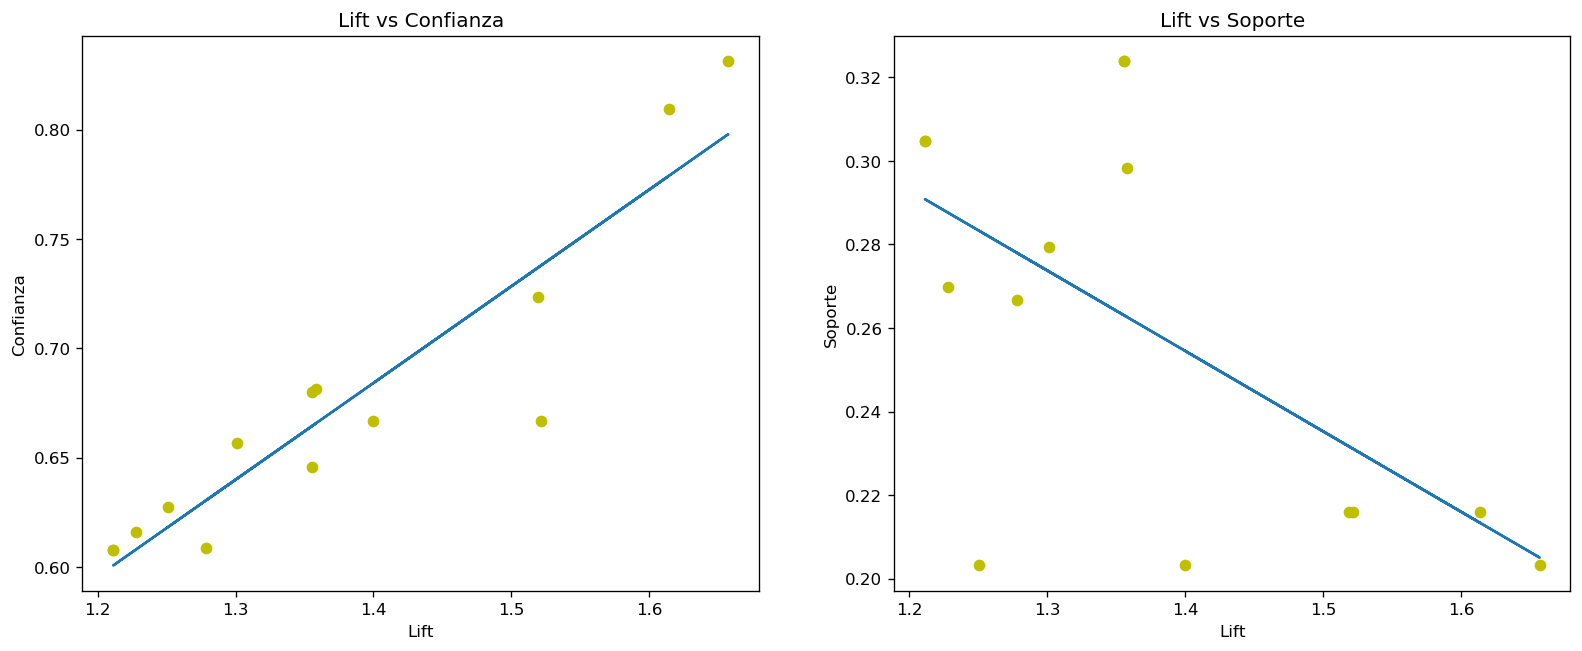

In [13]:
plt.rcdefaults()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6), dpi=120)

fit = np.polyfit(reglas_interesantes['lift'], reglas_interesantes['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(reglas_interesantes['lift'], 
         reglas_interesantes['confidence'], 'yo',
         reglas_interesantes['lift'],  
         fit_fn(reglas_interesantes['lift']))

ax1.set_xlabel('Lift')
ax1.set_ylabel('Confianza')
ax1.set_title('Lift vs Confianza')

fit = np.polyfit(reglas_interesantes['lift'], reglas_interesantes['support'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(reglas_interesantes['lift'], 
         reglas_interesantes['support'], 'yo',
         reglas_interesantes['lift'],  
         fit_fn(reglas_interesantes['lift']))

ax2.set_xlabel('Lift')
ax2.set_ylabel('Soporte')
ax2.set_title('Lift vs Soporte')

plt.show()

Finalmente, vemos que las rectas de `Lift vs Confianza` y`Lift vs Soporte` nos confirman el comportamiento inversamente proporcional de `confidence` y el `support`, dada la ecuación anteriormente definida:

$$
\text{lift}(X\to Y) = \frac{c(X\to Y)}{s(Y)}
$$

A mayor `lift`, mayor `confidence` y menor `support`.